## Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
db = pd.read_csv('db.csv', low_memory=False)
db.shape

(33543, 35)

In [3]:
db.columns

Index(['Unnamed: 0', 'FCS', 'CORR', 'BUFF_OVERFLOW', 'GENERIC', 'PCKT_NUM',
       'TIME(MS)', 'LENGTH', 'PAYLOAD', 'RSSI', 'CRC_OK', 'FRAME_TYPE',
       'SECURITY_ENABLED', 'FRAME_PENDING', 'ACKNOWLEDGE_REQ',
       'PAN_COMPRESSION', 'DEST_PAN', 'DEST_ADD', 'SRC_PAN', 'SRC_ADD', 'DATA',
       'CMD', 'ACK', '1_OCT_HEADER', 'CSL_WAKEUP', 'CSL_SECURE_ACK',
       'RFID_BLINK', 'BCN', 'TEST_TYPE', 'CONTROL', 'DOUBLENETWORK', 'ELECTRO',
       'NORMAL', 'VIENTO', 'WIRELESS'],
      dtype='object')

In [4]:
db = db.drop(['Unnamed: 0'], axis = 1)
db.head()

,FCS,CORR,BUFF_OVERFLOW,GENERIC,PCKT_NUM,TIME(MS),LENGTH,PAYLOAD,RSSI,CRC_OK,...,CSL_SECURE_ACK,RFID_BLINK,BCN,TEST_TYPE,CONTROL,DOUBLENETWORK,ELECTRO,NORMAL,VIENTO,WIRELESS
0,1,1,0,0,1,0.000000,11,NaN,-98.0,1.0,...,0,0,0,control,1,0,0,0,0,0
1,1,1,0,0,2,16751.182375,11,NaN,-99.0,1.0,...,0,0,0,control,1,0,0,0,0,0
2,1,1,0,0,3,1.070000,14,NaN,-90.0,1.0,...,0,0,1,control,1,0,0,0,0,0
3,1,1,0,0,4,652.697750,11,NaN,-91.0,1.0,...,0,0,0,control,1,0,0,0,0,0
4,1,1,0,0,5,2.006625,14,NaN,-90.0,1.0,...,0,0,1,control,1,0,0,0,0,0


In [5]:
db.columns

Index(['FCS', 'CORR', 'BUFF_OVERFLOW', 'GENERIC', 'PCKT_NUM', 'TIME(MS)',
       'LENGTH', 'PAYLOAD', 'RSSI', 'CRC_OK', 'FRAME_TYPE', 'SECURITY_ENABLED',
       'FRAME_PENDING', 'ACKNOWLEDGE_REQ', 'PAN_COMPRESSION', 'DEST_PAN',
       'DEST_ADD', 'SRC_PAN', 'SRC_ADD', 'DATA', 'CMD', 'ACK', '1_OCT_HEADER',
       'CSL_WAKEUP', 'CSL_SECURE_ACK', 'RFID_BLINK', 'BCN', 'TEST_TYPE',
       'CONTROL', 'DOUBLENETWORK', 'ELECTRO', 'NORMAL', 'VIENTO', 'WIRELESS'],
      dtype='object')

In [6]:
ignore = ['PAYLOAD', 'CRC_OK', 'FRAME_TYPE', 'DEST_PAN', 'DEST_ADD', 'SRC_PAN', 'SRC_ADD', 'TEST_TYPE', 'BUFF_OVERFLOW',
          'FCS', 'GENERIC']
y = db['CRC_OK']
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
33538    1.0
33539    0.0
33540    0.0
33541    1.0
33542    1.0
Name: CRC_OK, Length: 33543, dtype: float64

In [7]:
numdb = db.drop(ignore, axis = 1)
d = pd.DataFrame({'OK':y.values})
numdb = pd.concat([numdb, d], axis=1)
numdb.head()

,CORR,PCKT_NUM,TIME(MS),LENGTH,RSSI,SECURITY_ENABLED,FRAME_PENDING,ACKNOWLEDGE_REQ,PAN_COMPRESSION,DATA,...,CSL_SECURE_ACK,RFID_BLINK,BCN,CONTROL,DOUBLENETWORK,ELECTRO,NORMAL,VIENTO,WIRELESS,OK
0,1,1,0.000000,11,-98.0,0.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1.0
1,1,2,16751.182375,11,-99.0,0.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1.0
2,1,3,1.070000,14,-90.0,0.0,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,1.0
3,1,4,652.697750,11,-91.0,0.0,0.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,1.0
4,1,5,2.006625,14,-90.0,0.0,0.0,0.0,0.0,0,...,0,0,1,1,0,0,0,0,0,1.0


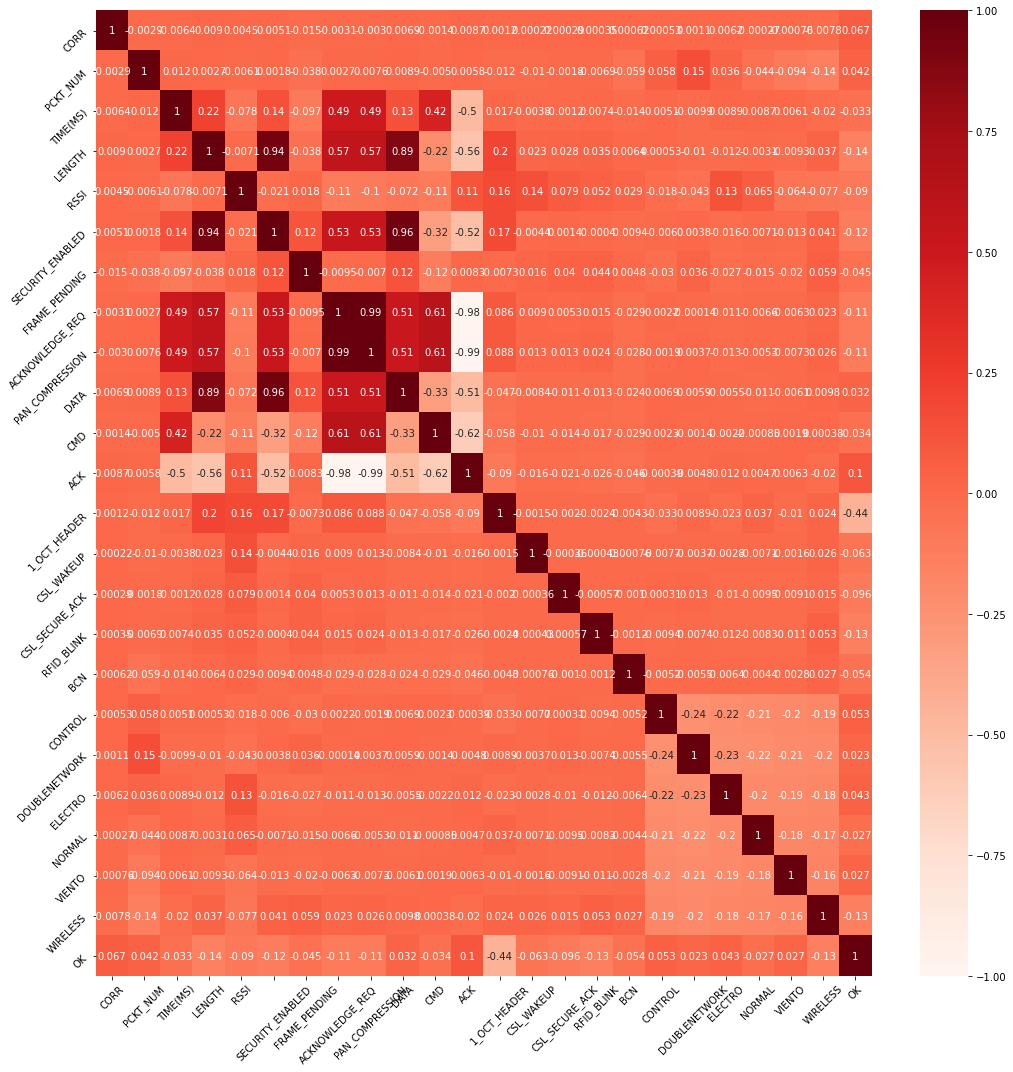

In [8]:
plt.figure(figsize=(15,15))
correlation = numdb.corr(method='pearson')
ax = sns.heatmap(correlation, annot = True, cmap='Reds', vmin=-1, vmax=1)
ax.set_yticklabels(list(numdb.columns), rotation = 45, fontsize = 10)
ax.set_xticklabels(list(numdb.columns), rotation = 45, fontsize = 10)
plt.tight_layout()
plt.savefig("corr-mtx.png", dpi=500)
plt.show()

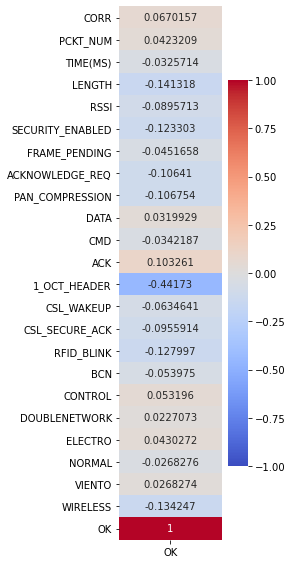

In [13]:
plt.figure(figsize=(4, 8))
df = pd.DataFrame(correlation['OK'],
              index=correlation.index)
sns.heatmap(df, annot=True, fmt="g", cmap='coolwarm', vmin=-1, vmax=1)
plt.tight_layout()
plt.savefig("corr-target.png", dpi=500)
plt.show()

In [14]:
for c in numdb.columns:
    s = numdb[c].isna().sum()
    print(c, s)

CORR 0
PCKT_NUM 0
TIME(MS) 0
LENGTH 0
RSSI 3
SECURITY_ENABLED 3
FRAME_PENDING 3
ACKNOWLEDGE_REQ 3
PAN_COMPRESSION 3
DATA 0
CMD 0
ACK 0
1_OCT_HEADER 0
CSL_WAKEUP 0
CSL_SECURE_ACK 0
RFID_BLINK 0
BCN 0
CONTROL 0
DOUBLENETWORK 0
ELECTRO 0
NORMAL 0
VIENTO 0
WIRELESS 0
OK 3


In [15]:
numdb[numdb.isna().any(axis=1)]

,CORR,PCKT_NUM,TIME(MS),LENGTH,RSSI,SECURITY_ENABLED,FRAME_PENDING,ACKNOWLEDGE_REQ,PAN_COMPRESSION,DATA,...,CSL_SECURE_ACK,RFID_BLINK,BCN,CONTROL,DOUBLENETWORK,ELECTRO,NORMAL,VIENTO,WIRELESS,OK
7730,0,1623,2844.606500,1,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,1,0,0,0,0,NaN
26155,0,2027,3815.639375,2,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,1,0,NaN
32045,0,2998,3.583625,2,NaN,NaN,NaN,NaN,NaN,0,...,0,0,0,0,0,0,0,0,1,NaN


In [16]:
mean_rssi = int(numdb['RSSI'].mean())
numdb['RSSI'] = numdb['RSSI'].fillna(mean_rssi)

In [29]:
numdb.columns

Index(['CORR', 'PCKT_NUM', 'TIME(MS)', 'LENGTH', 'RSSI', 'SECURITY_ENABLED',
       'FRAME_PENDING', 'ACKNOWLEDGE_REQ', 'PAN_COMPRESSION', 'DATA', 'CMD',
       'ACK', '1_OCT_HEADER', 'CSL_WAKEUP', 'CSL_SECURE_ACK', 'RFID_BLINK',
       'BCN', 'CONTROL', 'DOUBLENETWORK', 'ELECTRO', 'NORMAL', 'VIENTO',
       'WIRELESS', 'OK'],
      dtype='object')

In [17]:
numdb['SECURITY_ENABLED'] = numdb['SECURITY_ENABLED'].fillna(0)
numdb['FRAME_PENDING'] = numdb['FRAME_PENDING'].fillna(0)
numdb['ACKNOWLEDGE_REQ'] = numdb['ACKNOWLEDGE_REQ'].fillna(0)
numdb['PAN_COMPRESSION'] = numdb['PAN_COMPRESSION'].fillna(0)
numdb['OK'] = numdb['OK'].fillna(0)

In [18]:
numdb[numdb.isna().any(axis=1)]

,CORR,PCKT_NUM,TIME(MS),LENGTH,RSSI,SECURITY_ENABLED,FRAME_PENDING,ACKNOWLEDGE_REQ,PAN_COMPRESSION,DATA,...,CSL_SECURE_ACK,RFID_BLINK,BCN,CONTROL,DOUBLENETWORK,ELECTRO,NORMAL,VIENTO,WIRELESS,OK


In [19]:
xdb = numdb.drop(['OK'], axis = 1)
y = numdb['OK']
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
33538    1.0
33539    0.0
33540    0.0
33541    1.0
33542    1.0
Name: OK, Length: 33543, dtype: float64

In [85]:
X = xdb.to_numpy()
len(X[0]) # n features

23

In [21]:
n_samples, n_features = X.shape
print(n_samples, n_features)

33543 23


In [22]:
y.isna().sum()

0

In [23]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, discriminant_analysis, random_projection, neighbors)
import umap.umap_ as umap
from mpl_toolkits.mplot3d import Axes3D

In [24]:
y = y.values.astype(int)
y

array([1, 1, 1, ..., 0, 1, 1])

computing random projection


C:\Users\mariana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mariana

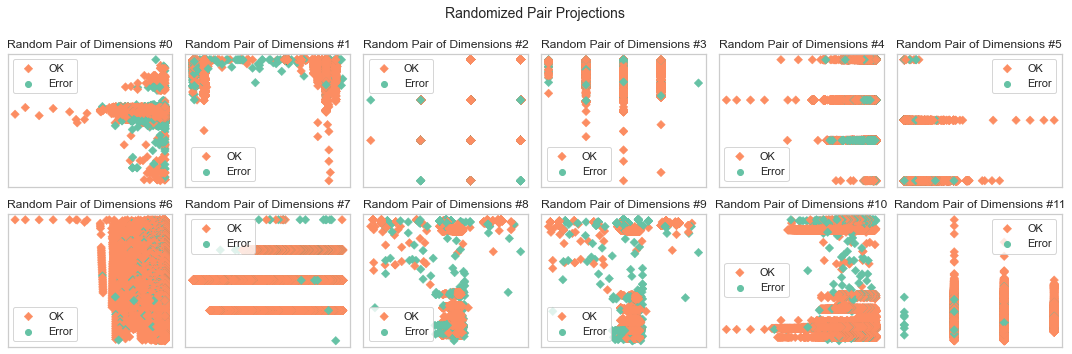

In [94]:
print('computing random projection')
figt = plt.figure( figsize=(15,5) )
rows = 2
cols = 6
axes = figt.subplots(rows, cols)
sns.set_style("whitegrid")
sns.color_palette("flare", as_cmap=True)
for r in range(rows):
    for c in range(cols):
        rp = random_projection.SparseRandomProjection(n_components=2, random_state=(r*cols+c))
        X2 = rp.fit_transform(X)

        colors = [int(i % 23) for i in y]
        sns.scatterplot(X2[:,0], X2[:,1], hue=colors, ax=axes[r][c], palette="Set2", edgecolor=None, marker='D')
        axes[r][c].set_title(f'Random Pair of Dimensions #{(r*cols+c)}', fontsize=12)
        axes[r][c].set_xticks([])
        axes[r][c].set_yticks([])
        axes[r][c].legend(['OK', 'Error'])
figt.suptitle('Randomized Pair Projections', fontsize=14)
figt.tight_layout()
plt.savefig("rand-proj.png", dpi=500)
plt.show()

computing Linear Discriminant Analysis Projection


C:\Users\mariana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


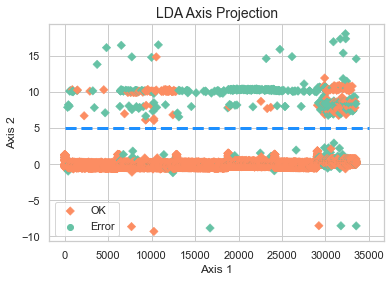

In [95]:
print('computing Linear Discriminant Analysis Projection')
sns.set_style("whitegrid")
sns.color_palette("flare", as_cmap=True)
X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01 # make x invertible
t0 = time()
X2 = discriminant_analysis.LinearDiscriminantAnalysis(n_components=1).fit_transform(X2, y)
colors = [int(i % 5) for i in y]
ax = sns.scatterplot(np.arange(len(X2[:,0])), X2[:,0], hue=colors, edgecolor=None, marker='D', palette="Set2")
ax.set_title('LDA Axis Projection', fontsize=14)
ax.set_xlabel('Axis 1', fontsize=12)
ax.set_ylabel('Axis 2', fontsize=12)
ax.legend(['OK', 'Error'])
ax.plot([-10,35000],[5, 5], color='dodgerblue', linestyle='dashed', lw=3)
plt.savefig("model-outcome.png", dpi=500)

computing random projection
[<AxesSubplot:> <AxesSubplot:>]


C:\Users\mariana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mariana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


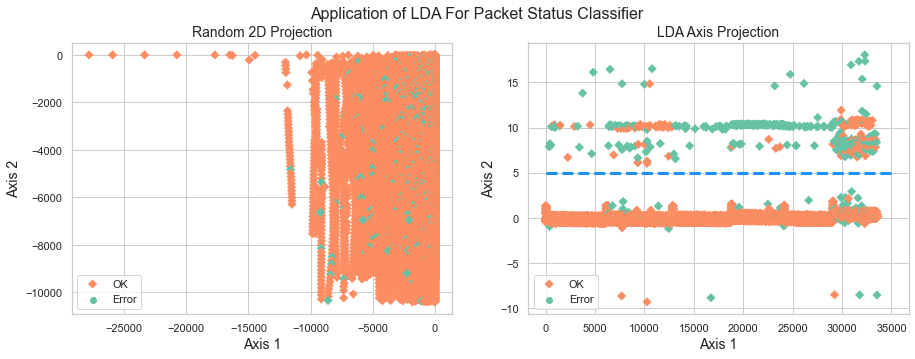

In [98]:
print('computing random projection')
figt = plt.figure( figsize=(15,5) )
rows = 1
cols = 2
axes = figt.subplots(rows, cols)
print(axes)
sns.set_style("whitegrid")
sns.color_palette("flare", as_cmap=True)

rp = random_projection.SparseRandomProjection(n_components=2, random_state=(6))
X2 = rp.fit_transform(X)
colors = [int(i % 23) for i in y]
sns.scatterplot(X2[:,0], X2[:,1], hue=colors, ax=axes[0], palette="Set2", edgecolor=None, marker='D')
axes[0].set_title('Random 2D Projection', fontsize=14)
axes[0].set_xlabel('Axis 1', fontsize=14)
axes[0].set_ylabel('Axis 2', fontsize=14)
axes[0].legend(['OK', 'Error'])

X2 = X.copy()
X2.flat[::X.shape[1] + 1] += 0.01 # make x invertible
X2 = discriminant_analysis.LinearDiscriminantAnalysis(n_components=1).fit_transform(X2, y)
sns.scatterplot(np.arange(len(X2[:,0])), X2[:,0], hue=colors, edgecolor=None, marker='D', palette="Set2", ax=axes[1])
axes[1].set_title('LDA Axis Projection', fontsize=14)
axes[1].set_xlabel('Axis 1', fontsize=14)
axes[1].set_ylabel('Axis 2', fontsize=14)
axes[1].legend(['OK', 'Error'])
axes[1].plot([-10,35000],[5, 5], color='dodgerblue', linestyle='dashed', lw=3)
figt.suptitle('Application of LDA For Packet Status Classifier', fontsize=16)
plt.show()

In [65]:
np.arange(len(X2[:,0]))

array([    0,     1,     2, ..., 33540, 33541, 33542])

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = numdb.drop(['OK'], axis = 1)
y = numdb['OK']

#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores)) 

0.9852725827144432


In [68]:
# choose the third row for test
test_ok = list(numdb[numdb['OK'] != 0].iloc[3].values)
test_ok = test_ok[:-1]
new = test_ok

#predict which class the new observation belongs to
model.predict([new])

array([1.])

In [69]:
data_plot = model.fit(X, y).transform(X)
target_names = ['err', 'ok', 'invalid']
#create LDA plot
plt.figure()
colors = ['red', 'blue', 'green']
lw = 2
data_plot

array([[0.61493626],
       [0.59051653],
       [1.28775858],
       ...,
       [0.30370069],
       [0.11467335],
       [0.37315197]])

<Figure size 432x288 with 0 Axes>

In [70]:
X.to_numpy()

array([[1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 1.67511824e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.00000000e+00, 1.07000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 4.49300000e+03, 3.72922775e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.49400000e+03, 7.67750000e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 4.49500000e+03, 1.86761650e+03, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [71]:
from sklearn.metrics import confusion_matrix
test_size = 0.33 # 33% de 768 is 254, the sum of all in matrix var
seed = 1
# returns you the subsets for training and testing for each x and y
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)
model.fit(x_train, y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted, labels=[1,0])
matrix

array([[10805,    60],
       [   97,   108]], dtype=int64)

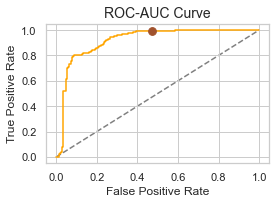

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression # math model for classification

seed=1
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
predicted = model.predict(x_test)
y_score = model.decision_function(x_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])

roc_display=RocCurveDisplay(fpr=fpr, tpr=tpr)#.plot(color='red')
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='orange')
plt.scatter([0.4732], [0.9945], marker='o', color='sienna', zorder = 10, s = 60)
plt.plot([0.0, 1.0], [0.0, 1.0], color='gray', zorder= -10, linestyle='dashed')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC Curve', fontsize=14)
plt.tight_layout()
plt.savefig("roc-curve.png", dpi=500)
plt.show()

In [31]:
numdb[numdb.isna().any(axis=1)]

,CORR,PCKT_NUM,TIME(MS),LENGTH,RSSI,SECURITY_ENABLED,FRAME_PENDING,ACKNOWLEDGE_REQ,PAN_COMPRESSION,DATA,...,CSL_SECURE_ACK,RFID_BLINK,BCN,CONTROL,DOUBLENETWORK,ELECTRO,NORMAL,VIENTO,WIRELESS,OK


In [32]:
test_ok = list(numdb[numdb['OK'] != 0].iloc[0].values)
test_ok

[1.0,
 1.0,
 0.0,
 11.0,
 -98.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0]

In [33]:
model.coef_

array([[ 7.69344155e+01,  1.10133956e-04,  9.56772862e-06,
         2.39615573e-02, -6.88754162e-03, -4.46556275e+01,
        -1.15757169e+00, -3.53353596e+00,  5.58806290e+00,
         3.95086209e+01, -4.00716585e+00, -4.30604969e-01,
        -1.34989181e+01, -4.05986313e+01, -4.02669576e+01,
        -3.71668047e+01, -4.67141247e+00,  5.77937407e-01,
         4.76193622e-01,  5.41270345e-01, -4.07661630e-01,
         3.40527820e-01, -1.98196277e+00]])

In [34]:
np.unique(y)

array([0., 1.])